In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import signal

# Discrete Convolution

In [2]:
# Discrete Convolution
def discrete_conv(f, g):
    h = np.convolve(f, g)
    
    return h

In [3]:
# Plotting descrete distribution function 
def discrete_dist_plot(dist_name, dist_vals):
    #dist_vals = np.array(dist_vals, dtype = float)
    pdf = dist_vals
    x = np.linspace(0, pdf.shape[0] + 2, 100)
    y = np.linspace(0, 1, 50)
    
    if dist_name == "geometric":
        dist_range1 = list(range(1, pdf.shape[0] + 1))
        dist_range2 = list(range(2, pdf.shape[0] + 2))
    else:
        dist_range1 = list(range(0, pdf.shape[0]))
        dist_range2 = list(range(1, pdf.shape[0] + 1))
    
    # Plot pdf
    plt.figure(1)
    plt.vlines(dist_range1, 0 , pdf, color='k', lw = 1.2)
    plt.scatter(dist_range1, pdf, s=30, facecolors='b', edgecolors='k')
    plt.title('PDF of ' + dist_name)
    plt.ylabel('h')
    plt.xlabel('k')
    plt.xlim([-0.5, 6])
    plt.ylim([0, max(pdf) + 0.1])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    
    plt.savefig('pdf_' + dist_name + '.png', dpi=150)
    plt.show()

[0.25    0.25    0.25    0.15625 0.0625  0.03125]
6


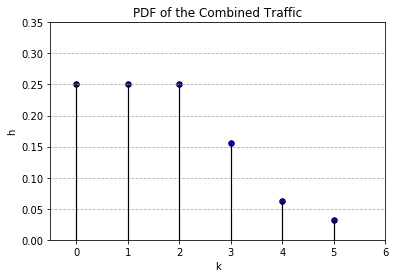

In [4]:
f = [0.5, 0.25, 0.25]
g = [0.5, 0.25, 0.125, 0.125]
h = discrete_conv(f, g)
print(h)
print(h.shape[0])
discrete_dist_plot('the Combined Traffic', h)

# Convolution of 2 Rectangles
Examples from the lecture node

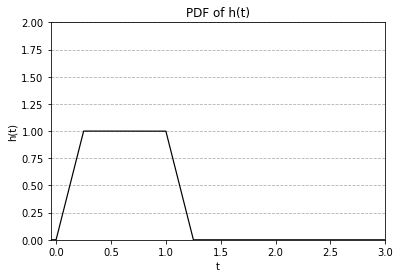

In [5]:
# Create two rectangles as two uniform distribution
uniform_dist_1 = stats.uniform(loc=2, scale=0.25)
uniform_dist_2 = stats.uniform(loc=0, scale=1)

delta = 1e-4
big_grid = np.arange(-1,5,delta)

pmf1 = uniform_dist_1.pdf(big_grid)*delta
pmf2 = uniform_dist_2.pdf(big_grid)*delta
conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')

pdf1 = pmf1/delta
pdf2 = pmf2/delta
conv_pdf = conv_pmf/delta

#plt.plot(big_grid,pdf1, label='Uniform')
#plt.plot(big_grid,pdf2, label='Gaussian')
plt.plot(big_grid,conv_pdf, label='Sum', color='k', lw = 1.2)
plt.grid(which = 'both', linestyle='--', axis = 'y')
#plt.legend(loc='best'), plt.suptitle('PDFs')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('PDF of h(t)')
plt.xlim([-.05, 3])
plt.ylim([0, 2])
plt.savefig('pdf_ht.png', dpi=150)
plt.show()

# Multiplicative Congruential Method
Using the multiplicative congruential method to generate random numbers

In [6]:
def mul_cong(seed, a, m, n):
    results = []
    results.append(seed)
    for i in range(1, n+1):
        seed = (a*seed)%m
        results.append(seed)
    
    return results

In [7]:
p3 = mul_cong(5, 7, 16, 12)
print(p3)

[5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5]


# Additive Congruential Method
Using additive congruential method to generate random numbers

In [8]:
def add_cong(seq, k, m, n):
    for i in range(len(seq)-1, n+len(seq)-1):
        z = (seq[i] + seq[i-k+1])%m
        seq.append(z)
    
    return seq

In [9]:
p4 = add_cong([1, 7, 6, 9], 3, 16, 12)
print(p4)

[1, 7, 6, 9, 0, 6, 15, 15, 5, 4, 3, 8, 12, 15, 7, 3]


# Tausworthe's Bitwise Additive Congruential Method

In [10]:
def dec2bin(dec):
    binaries = []
    bin_str = "{0:b}".format(dec)
    if len(bin_str) < 4:
        bin_str = '00'+bin_str
    for i in range(len(bin_str)):
        binaries.append(int(bin_str[i]))
    
    return binaries

In [11]:
def bin2dec(binaries):
    decs = []
    for i in range(0, len(binaries) - 3):
        val = binaries[i]*2**3 + binaries[i+1]*2**2 + binaries[i+2]*2**1 + binaries[i+3]
        decs.append(val)
    
    return decs

In [12]:
def tausworthe(seed, r, q, n):
    results = dec2bin(seed)
    for i in range(len(results)-1, n+len(results)-1):
        b = (results[i-r+1])^(results[i-q+1])
        results.append(b)
    results = bin2dec(results)
    
    return results

In [13]:
p5 = tausworthe(3, 1, 3, 12)
print(p5)

[3, 7, 14, 13, 10, 4, 9, 3, 7, 14, 13, 10, 4]


# Check Uniform Distribution
(a) Generate 500,000 random numbers of uniform distribution from 0 to 1 and check if the distribution is acceptable with the probability of 0.9 using the $\chi^2$ test 

(b) Draw CDF for both the observed and estimated data

(c) Check the independency 

In [14]:
# Check uniform distribution
def uniform_check(n, low, high, step):
    uni = np.random.uniform(low, high, n)
    observed = []
    estimated = n/step
    
    # Create the interval
    for i in range(step):
        observed.append(0)
    
    # Count the observed
    for i in range(n):
        index = int(uni[i]*10)
        observed[index] = observed[index] + 1
        
    # Calculate the chi squared
    chi_squared = 0
    for i in range(0, step):
        chi_squared = chi_squared + ((observed[i] - estimated)**2)/estimated
    
    return observed, chi_squared, uni

In [129]:
observed, chi_squared, uni = uniform_check(500000, 0, 1.0, 10)
print(observed)
print(chi_squared)

[50142, 50085, 49830, 49974, 50057, 50043, 50052, 49898, 49801, 50118]
2.57392


In [132]:
def cdf_plot(cdf, name):
    x = np.linspace(0, len(cdf) + 2, 100)
    dist_range1 = list(range(0, len(cdf)))
    dist_range2 = list(range(1, len(cdf) + 1))
    for i in dist_range1:
        plt.plot(x[(x >= i) & (x <= (i+1))], cdf[i] + x[(x>=i) & (x<=(i+1))]*0, color='k', lw = 1.2)

    plt.scatter(dist_range2, cdf, s=30, facecolors='b', edgecolors='k')
    plt.title('CDF of the ' + name + ' data')
    plt.ylabel('F(k)')
    plt.xlabel('k')
    #plt.xlim([0, 9])
    plt.ylim([0, max(cdf) + 0.2])
    plt.grid(which = 'both', linestyle='--', axis = 'y')

    plt.savefig('cdf_'+ name + '_p6.png', dpi=150)
    plt.show()

[0.100284, 0.200454, 0.300114, 0.400062, 0.500176, 0.600262, 0.7003659999999999, 0.8001619999999999, 0.8997639999999999, 0.9999999999999999]
[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]


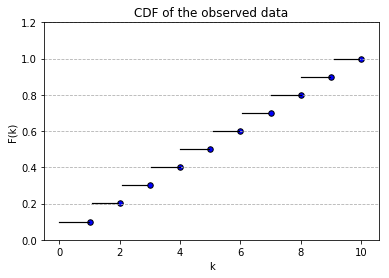

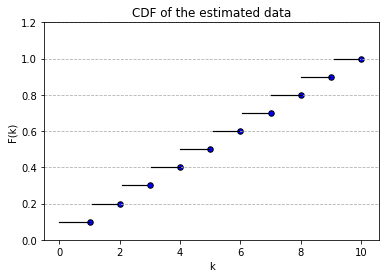

In [133]:
# Plot CDF
observed_cdf = [0]
estimated_cdf = [0]
for i in range(0, len(observed)):
    observed_cdf.append(observed_cdf[i] + observed[i]/500000)
    estimated_cdf.append(estimated_cdf[i] + 0.10)

del observed_cdf[0]
del estimated_cdf[0]

print(observed_cdf)
print(estimated_cdf)

cdf_plot(observed_cdf, 'observed')
cdf_plot(estimated_cdf, 'estimated')

# Check Independency using Relative Distance Technique

In [134]:
# Relative distance function
def independency_check(z, step):
    rd_count = []
    rd = []
    for i in range(len(z)-1):
        if z[i+1] < z[i]:
            rd.append((1 - z[i]) + z[i+1])
        else:
            rd.append(z[i+1] - z[i])
            
    # Create the interval
    for i in range(step):
        rd_count.append(0)
    
    # Count the observed
    for i in range(len(rd)):
        index = int(rd[i]*10)
        rd_count[index] = rd_count[index] + 1
    
    # Calculate the chi squared
    estimated = len(rd)/step
    
    chi_squared = 0
    for i in range(0, step):
        chi_squared = chi_squared + ((rd_count[i] - estimated)**2)/estimated
    
    return rd_count, chi_squared

In [135]:
rd_count, chi_squared_2 = independency_check(uni, 10)
print(rd_count)
print(chi_squared_2)

[50258, 50029, 49983, 49956, 50220, 49757, 50202, 49755, 50009, 49830]
6.137790275580551


In [137]:
print('Uniform Check')
print(chi_squared)
print('Independency Check')
print(chi_squared_2)

Uniform Check
2.57392
Independency Check
6.137790275580551
